In [2]:
pip install fredapi

The system cannot find the path specified.


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 100)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd0577c531c4595af1b3f387bb1ec9ca8'







In [177]:
# Create FRED object

fred = Fred(api_key=fred_key)



In [178]:
# Search for economic data
fred.search('S&P').head()

sp_search = fred.search('S&P', order_by='popularity')

sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-05-19,2023-05-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-19 09:21:06-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-05-19,2023-05-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-04-25 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-05-19,2023-05-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-19 09:21:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-05-19,2023-05-19,S&P 500,2013-05-20,2023-05-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-05-18 19:10:53-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-05-19,2023-05-19,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCIYISGBA066NRUG,HCIYISGBA066NRUG,2023-05-19,2023-05-19,Index of Human Capital per Person for United K...,1950-01-01,2019-01-01,Annual,A,Index,Index,Not Seasonally Adjusted,NSA,2021-01-21 13:29:55-06:00,3,"Index of human capital per person, based on ye..."
HC01ESTVC1704013,HC01ESTVC1704013,2023-05-19,2023-05-19,Bachelor's Degree or Higher (5-year estimate) ...,2010-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:44:11-06:00,3,Estimate of educational attainment for populat...
GCT1502CT,GCT1502CT,2023-05-19,2023-05-19,Bachelor's Degree or Higher for Connecticut,2006-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-15 11:00:19-05:00,3,Estimate of educational attainment for populat...


In [180]:
# Pull Raw Data
sp500 = fred.get_series('SP500')

<AxesSubplot:title={'center':'S&P500'}>

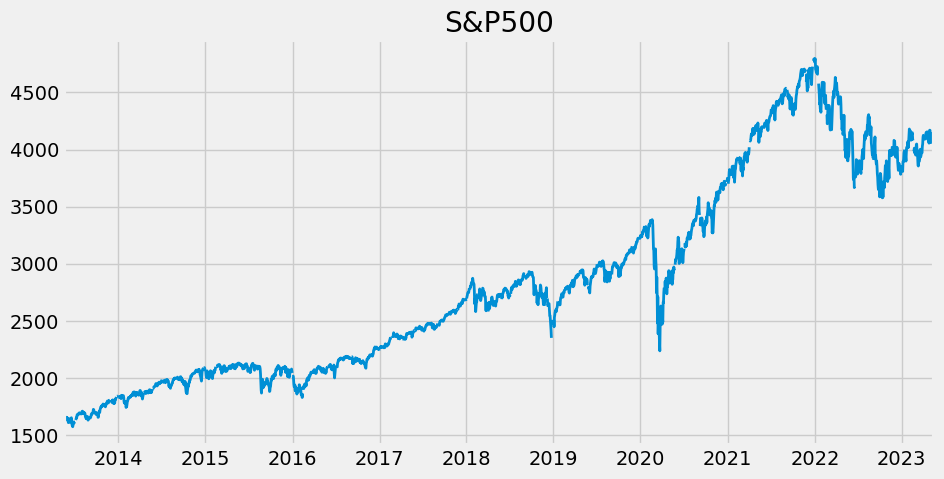

In [181]:
sp500.plot(figsize=(10,5), title='S&P500', lw=2)

In [182]:
# pull & join time series data sets 

unemp_results = fred.search('unemployment')





In [183]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-05-19,2023-05-19,Unemployment Rate,1948-01-01,2023-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-05 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-05-19,2023-05-19,Unemployment Rate,1948-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-05 07:43:02-05:00,57,The unemployment rate represents the number of...
CCSA,CCSA,2023-05-19,2023-05-19,Continued Claims (Insured Unemployment),1967-01-07,2023-05-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-05-18 07:33:05-05:00,76,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-05-19,2023-05-19,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,69,"Starting with the July, 2021 report: An Update..."
CCNSA,CCNSA,2023-05-19,2023-05-19,Continued Claims (Insured Unemployment),1967-01-07,2023-05-06,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-05-18 07:33:09-05:00,33,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMUNRRTTBEM156S,LMUNRRTTBEM156S,2023-05-19,2023-05-19,Labour - Other Labour Market Measures: Registe...,1979-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-10 14:35:11-05:00,5,OECD descriptor ID: LMUNRRTT OECD unit ID: STS...
GRAN326UR,GRAN326UR,2023-05-19,2023-05-19,"Unemployment Rate in Grand Rapids-Wyoming, MI ...",1990-01-01,2023-03-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-05-03 13:32:12-05:00,4,None
LNS13023705,LNS13023705,2023-05-19,2023-05-19,Unemployment Level - Job Leavers,1967-01-01,2023-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-05-05 07:44:52-05:00,4,The series comes from the 'Current Population ...


In [184]:
unrate = fred.get_series('UNRATE')

unrate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
Length: 904, dtype: float64

In [31]:
# unrate.plot()

In [185]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]



In [243]:
all_results = []


for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [244]:
uemp_results = pd.concat(all_results, axis=1).drop(['M0892BUSM156SNBR', 'USAURHARMMDSMEI'], axis=1)

In [245]:
uemp_states = uemp_results.drop('UNRATE', axis=1)


In [246]:
uemp_states.drop(index=uemp_states.index[-1], 
        axis=0, 
        inplace=True)

In [247]:
uemp_states = uemp_states.drop('M0892AUSM156SNBR', axis=1)

In [248]:
#dirty clean up could be done easier if choose only values that end in UR

uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('LNS')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('LRU')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('CNE')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('LAS')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('CMW')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('CSO')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('LRH')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('CWS')]
uemp_states= uemp_states.loc[:, ~uemp_states.columns.str.startswith('U2')]

In [249]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [250]:
uemp_states.isna().sum(axis=1)
# uemp_states.drop(index=uemp_states.index[-1], 
#         axis=0, 
#         inplace=True)
# uemp_states
uemp_states = uemp_states.dropna()

In [251]:
uemp_states

,California,Florida,New York,Texas,Ohio,Pennsylvania,Massachusetts,Michigan,Alabama,Illinois,...,Puerto Rico,Hawaii,Wyoming,Maine,South Dakota,Delaware,Rhode Island,Montana,Idaho,Vermont
1976-01-01,9.2,9.7,10.3,5.8,8.1,8.0,10.5,9.9,6.6,6.6,...,19.6,9.8,4.1,8.7,3.3,8.0,7.8,5.8,5.6,8.6
1976-02-01,9.2,9.7,10.3,5.8,8.1,8.1,10.5,9.9,6.6,6.6,...,19.5,9.8,4.1,8.7,3.3,8.0,7.8,5.8,5.6,8.6
1976-03-01,9.1,9.6,10.2,5.9,8.1,8.1,10.5,9.9,6.6,6.6,...,19.3,9.8,4.1,8.6,3.2,8.0,7.7,5.8,5.6,8.6
1976-04-01,9.1,9.5,10.2,5.9,8.0,8.1,10.3,9.8,6.5,6.6,...,19.0,9.7,4.0,8.6,3.1,8.1,7.7,5.8,5.6,8.6
1976-05-01,9.0,9.3,10.1,5.9,7.8,8.1,10.1,9.6,6.4,6.6,...,18.9,9.4,3.9,8.5,3.1,8.3,7.7,5.8,5.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,2.7,4.1,3.8,4.1,4.4,3.7,4.4,2.6,4.6,...,6.0,3.7,3.9,3.1,2.2,4.7,3.3,2.7,2.8,3.1
2022-12-01,4.1,2.7,4.1,3.8,4.1,4.3,3.7,4.3,2.6,4.6,...,6.0,3.7,3.9,3.1,2.2,4.6,3.2,2.6,2.8,3.0
2023-01-01,4.2,2.6,4.2,3.9,4.0,4.3,3.5,4.3,2.6,4.5,...,6.0,3.6,3.9,2.9,2.1,4.6,3.1,2.5,2.7,2.9
2023-02-01,4.4,2.6,4.2,4.0,3.9,4.4,3.7,4.3,2.5,4.5,...,6.0,3.6,3.8,2.8,2.1,4.6,3.1,2.4,2.6,2.8


In [252]:
px.line(uemp_states)

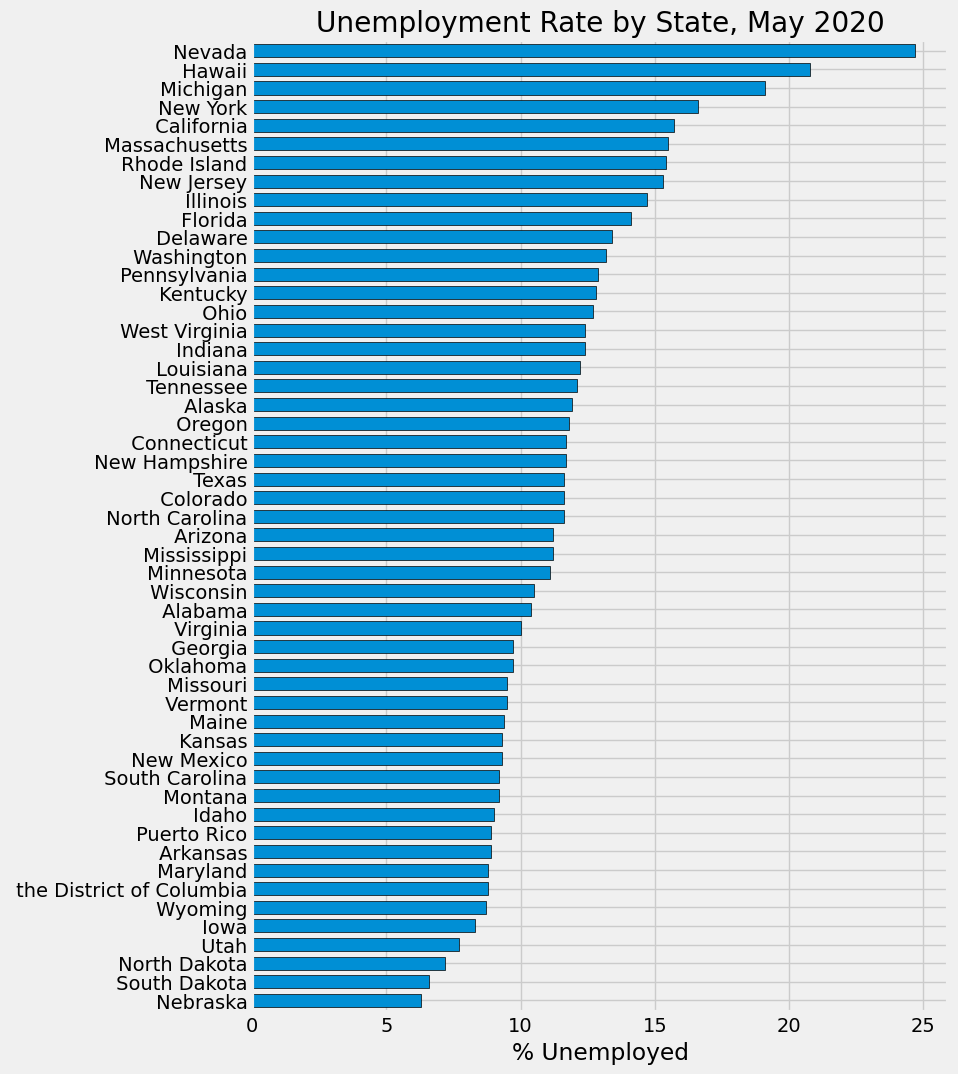

In [286]:
# Pull april 2020 rate per state


ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()